In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Titanic Survival Exploration

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


### Load the Titanic Dataset into a `DataFrame`

In [3]:
# Load the dataset
titanic_data_location = '/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/data/titanic.csv'
titanic_data_df = pd.read_csv(titanic_data_location)

### Display the first few rows of your `DataFrame`

In [4]:
titanic_data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **survived**: Outcome of survival (0 = No; 1 = Yes)
- **pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **name**: Name of passenger
- **sex**: Sex of the passenger
- **age**: Age of the passenger (Some entries contain `NaN`)
- **sibsp**: Number of siblings and spouses of the passenger aboard
- **parch**: Number of parents and children of the passenger aboard
- **ticket**: Ticket number of the passenger
- **fare**: Fare paid by the passenger
- **cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
- **boat**
- **body**
- **home.dest**

## Exploratory Analysis

### Display a Seaborn Pairplot of the Titanic Data

Be sure to handle `np.nan` in your data.

http://stackoverflow.com/questions/20656663/matplotlib-pandas-error-using-histogram

In [7]:
titanic_minimal = titanic_data_df[["pclass","sex","age","sibsp","parch","survived"]]

In [9]:
titanic_minimal.head(1)

,pclass,sex,age,sibsp,parch,survived
0,1,female,29.0,0,0,1


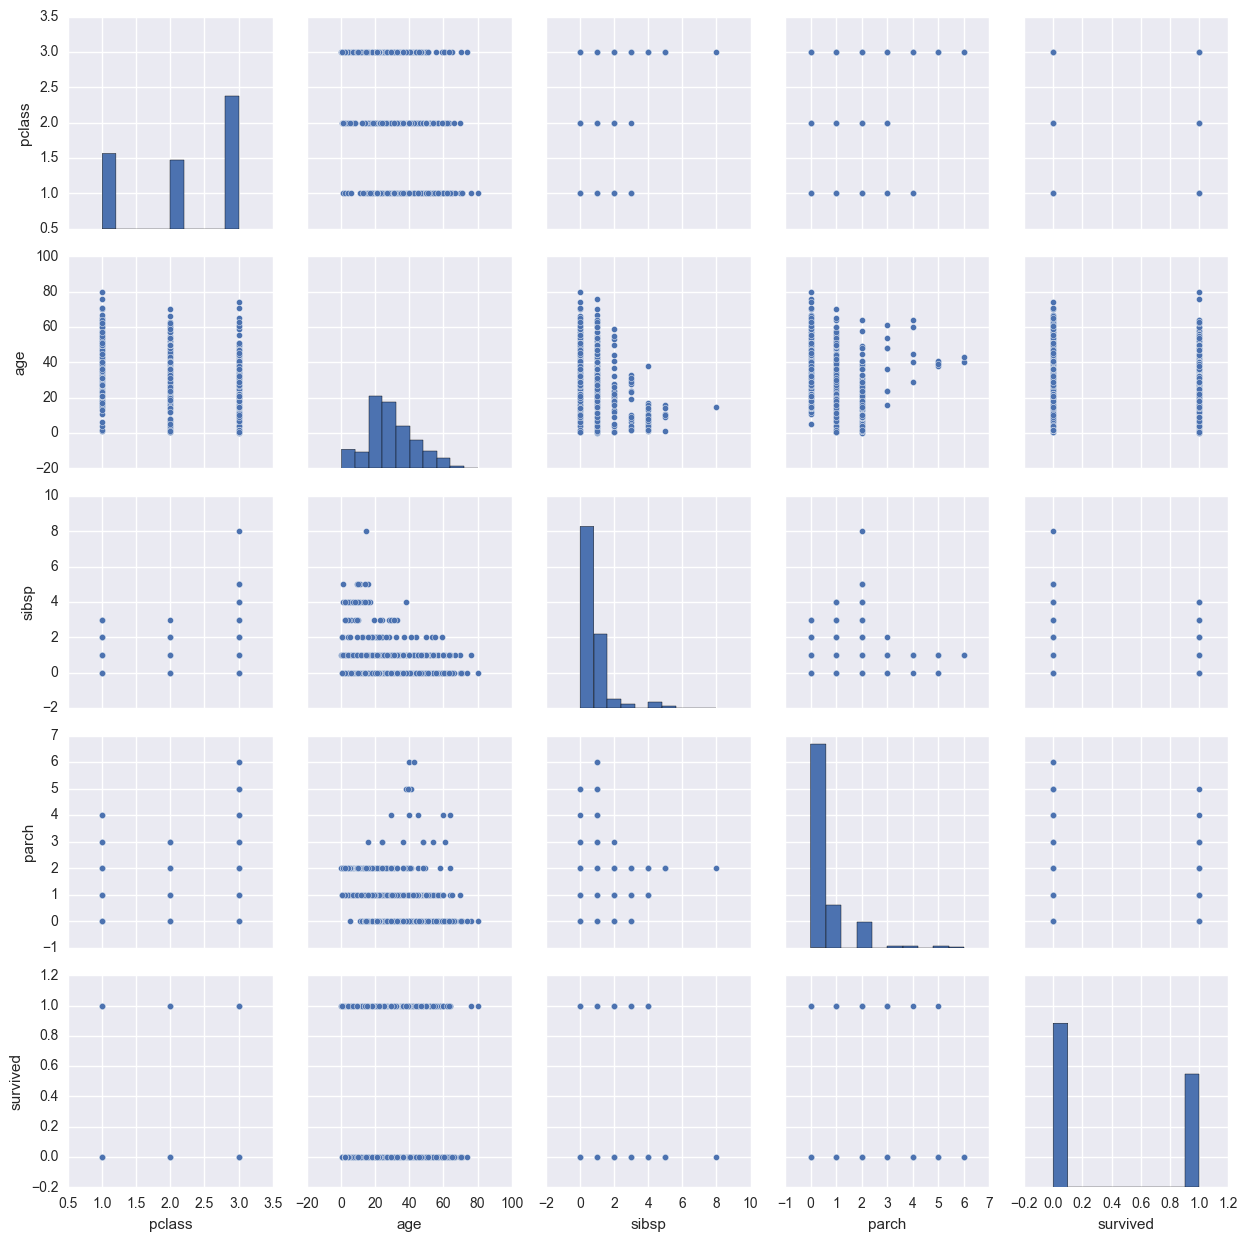

In [5]:
sns.pairplot(titanic_data_df[["pclass","sex","age","sibsp","parch","survived"]].dropna())

### Visualization of Survival by Feature with Seaborn

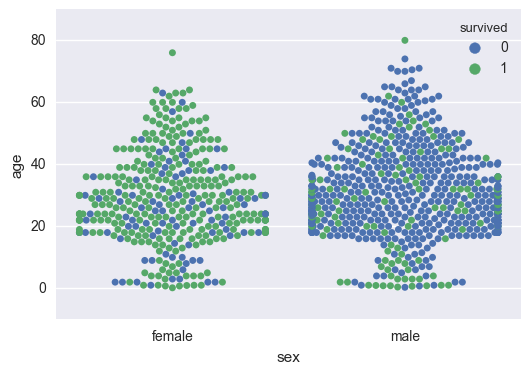

In [13]:
sns.swarmplot(x="sex", y="age", hue="survived", data=titanic_data_df)

Display as many more `swarmplots` as you need to identify salient features.

### Prepare Feature `DataFrame` and Target `Series`

Store the Survived column as a `Series` called `titanic_target`.

Prepare a dataframe of the columns you have found to be salient called `titanic_features`.

In [23]:
titanic_target = titanic_data_df['survived']
titanic_feature = titanic_data_df[["fare","age","parch","sibsp","pclass","sex","embarked"]]

### Clever use of `np.mean()`

In [ ]:
titanic_target[:5].mean()

In [ ]:
np.array((True, False, False, False)).mean()

## Metric and Benchmark

### Prepare a Metric to Measure the Performance of our Predictions

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers. 

We will be aiming for an accuracy of greater than 80%.

In [24]:
titanic_target[:5]

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [25]:
def accuracy_score(actual, predicted):
    
    """ 
    A function that compares a set of actual outcomes to predicted outcomes 
    and returns a proportion from 0 to 1 
    """
    
    return np.array(actual == predicted).mean()

#### Test the 'accuracy_score' function

In [26]:
predictions = pd.Series(np.ones(5, dtype = int))

print """
Considering the first five passengers, 
a prediction of everyone survived should 
return an accuracy of 0.4. Our metric predicts {}.
      """.format(accuracy_score(predictions, titanic_target[:5]))




Considering the first five passengers, 
a prediction of everyone survived should 
return an accuracy of 0.4. Our metric predicts 0.4.
      


### Show that the actual Survival Rate is 0.38197

In [27]:
print "The actual survival rate is {}.".format(None)

The actual survival rate is None.


### A Prediction of No Survivors

Considering that any single passenger is more likely to have not survived, develop a model that predicts no survivors.

In [28]:
titanic_feature.shape

(1309, 7)

In [30]:
def model_0_no_survivors(titanic_feature):
    """ Returns a vector of zeros the same length as the feature dataframe."""

    n = titanic_feature.shape[0]
    return pd.Series(np.zeros(n))

#### Make the Predictions

In [31]:
model_0_predictions = model_0_no_survivors(titanic_feature)

### How accurate would a prediction be that none of the passengers survived?

In [32]:
print accuracy_score(titanic_target, model_0_predictions)

0.618029029794


## Women and Children, First! 

In [ ]:
sns.swarmplot(x="sex", y="age", hue="survived", data=titanic_data_df)

### Clever Use of `np.mean()`

In [35]:
(np.array((True,False,True)) + np.array((False,True,False))).mean()

1.0

In [43]:
def model_1_women_first(titanic_feature):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    women = titanic_feature['sex']  == 'female'
    
    return women

# Make the predictions
model_1_predictions = model_1_women_first(titanic_feature)

### Question 2
*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*  

In [44]:
print accuracy_score(titanic_target, model_1_predictions)

0.779984721161


In [39]:
def model_2_women_and_children(titanic_data_df):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    women = titanic_feature['sex'] == 'female'
    children = titanic_feature['age'] < 10
    return women + children

# Make the predictions
prediction_women_and_children = model_2_women_and_children(titanic_data_df)

### Question 3
*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?*  

In [40]:
print accuracy_score(titanic_target, prediction_women_and_children)

0.785332314744


**Answer**: Predicting that all females and children younger than 10 survived and all others did not gives an accuracy of 79.35%.

In [81]:
def model_3_women_children_first_class(titanic_data_df):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. 
            - Predict a passenger survived if they are first class and younger than 18. """
    women = titanic_feature['sex'] == 'female'
    children = titanic_feature['age'] < 10
    first_class_minors = ((titanic_feature['age'] < 28) & (titanic_feature['pclass'] == 1))
    
    return women + children + first_class_minors

In [82]:
prediction_model_3 = model_3_women_children_first_class(titanic_data_df)

In [83]:
accuracy_score(titanic_target, prediction_model_3)

0.78456837280366687